# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-16 11:47:12--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.006s  

2022-11-16 11:47:12 (8.93 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

(846, 19) (846,)


In [ ]:
dataset[:, 0] #получается, нулевой столбец, это id

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[:, 1:], target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,90,40,83,178,61,8,178,37,21,132,199,472,157,71,1,14,187,193
1,89,41,63,134,59,6,123,55,17,137,148,223,150,76,12,3,186,188
2,89,35,70,138,58,7,126,53,17,128,147,237,112,64,4,19,199,207
3,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201
4,87,42,64,150,64,10,133,50,18,141,157,265,159,67,7,0,193,201
5,98,39,68,136,56,8,131,52,18,144,159,251,134,72,4,10,186,187
6,88,40,73,173,68,7,150,44,19,137,174,341,151,69,2,20,196,200
7,96,45,80,162,63,9,146,46,19,148,161,316,161,64,5,10,199,207
8,105,51,93,160,51,7,217,30,24,165,240,703,208,81,9,25,188,188
9,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.522769,44.786885,81.795993,168.868852,61.856102,8.591985,167.927140,41.040073,20.504554,147.806922,188.074681,434.340619,174.200364,72.477231,6.491803,12.198543,189.091075,195.726776
std,8.219721,5.994229,15.394043,33.830798,8.551436,4.951702,31.862819,7.564216,2.470719,14.208788,30.324400,168.502406,31.825194,7.928624,4.896597,9.036358,6.236145,7.448242
min,73.000000,34.000000,44.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,320.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,362.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,96.000000,196.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,216.000000,578.000000,197.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,116.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
dtypes: int64(18)
memory usage: 77.3 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Как мы заметили, первый столбец

Раз впереди ждут линейные методы, то хорошая идея будет отнормировать данные, а также посмотреть на них. 

In [ ]:
#А давайте посмотрим на баланс классов
classes, class_counts = np.unique(y_train, return_counts=True)
print(classes)
print(class_counts)
print(class_counts/len(y_train)*100)

['bus' 'opel' 'saab' 'van']
[141 151 129 128]
[25.68306011 27.50455373 23.49726776 23.3151184 ]


В целом, все хорошо с балансом классов

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

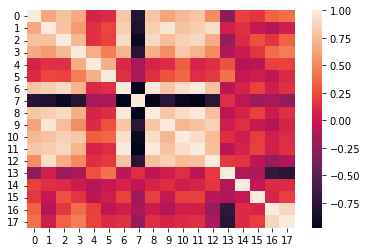

In [ ]:
sns.heatmap(X_train_pd.corr())

Можно увидеть много скоррелированных фичей.
Можно было бы что-то поделать, но датасет и так маленький.

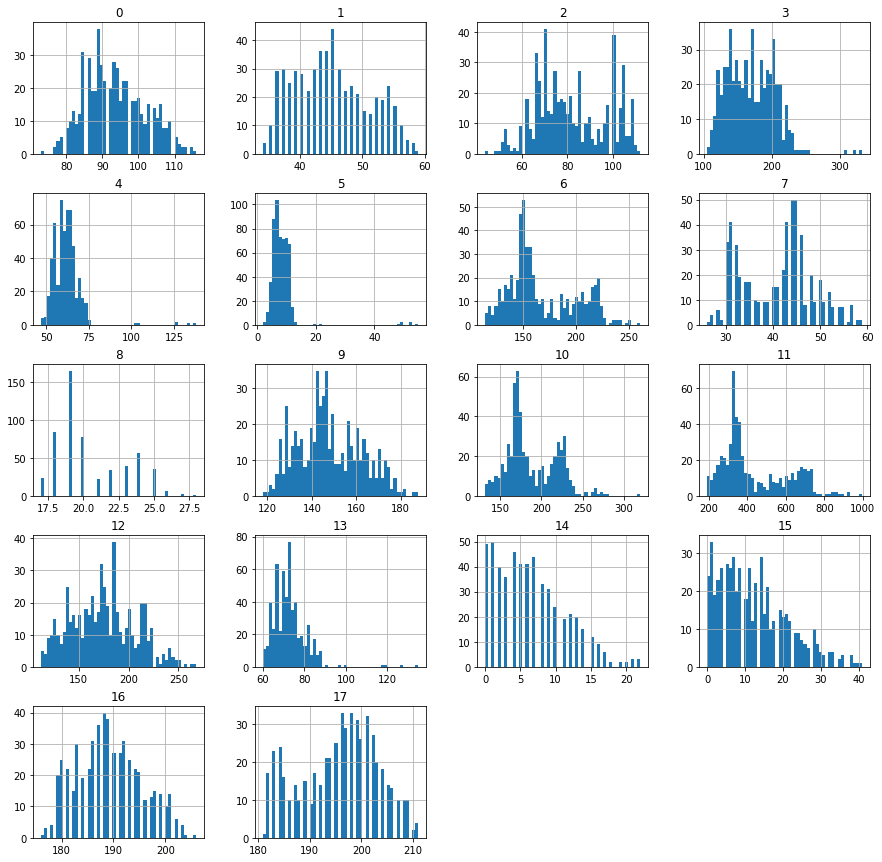

In [ ]:
X_train_pd.hist(bins=50, figsize=(15,15))
plt.show()

Раз у нас дальше будет логистическая регрессия, поэтому, хорошая идея нормировать фичи


In [ ]:
#Хорошая идея нормировать фичи, если потом идет регрессия 
from sklearn.preprocessing import StandardScaler

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
parameters = {
    'logisticregression__penalty': ['l1', 'l2'], 
    'logisticregression__C': np.around(np.logspace(-1, 2, 10), decimals = 2)
    }
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=0)
scoring = ['accuracy','f1_macro']

In [ ]:
def grid_cv(model, param, x_train, y_train):
  grid = GridSearchCV(model, 
                           param, scoring=scoring, refit='accuracy', return_train_score=True)
  grid.fit(x_train, y_train)
  results_grid_cv = zip(grid.cv_results_['params'], 
                      np.around(grid.cv_results_['mean_train_accuracy'], decimals = 3),
                      np.around(grid.cv_results_['mean_train_f1_macro'], decimals = 3),
                      np.around(grid.cv_results_['mean_test_accuracy'], decimals = 3), 
                      np.around(grid.cv_results_['mean_test_f1_macro'], decimals = 3))

  return grid, list(results_grid_cv)

In [ ]:
grid_logreg, res_logreg = grid_cv(make_pipeline(StandardScaler(), logreg), parameters, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print('mean_train_accuracy, mean_train_f1_macro, mean_test_accuracy, mean_test_f1_macro')
res_logreg

mean_train_accuracy, mean_train_f1_macro, mean_test_accuracy, mean_test_f1_macro


[({'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'},
  0.737,
  0.722,
  0.712,
  0.693),
 ({'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'},
  0.772,
  0.762,
  0.752,
  0.743),
 ({'logisticregression__C': 0.22, 'logisticregression__penalty': 'l1'},
  0.764,
  0.753,
  0.749,
  0.736),
 ({'logisticregression__C': 0.22, 'logisticregression__penalty': 'l2'},
  0.794,
  0.788,
  0.763,
  0.756),
 ({'logisticregression__C': 0.46, 'logisticregression__penalty': 'l1'},
  0.796,
  0.792,
  0.769,
  0.763),
 ({'logisticregression__C': 0.46, 'logisticregression__penalty': 'l2'},
  0.801,
  0.798,
  0.772,
  0.768),
 ({'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1'},
  0.821,
  0.82,
  0.792,
  0.79),
 ({'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'},
  0.813,
  0.811,
  0.789,
  0.786),
 ({'logisticregression__C': 2.15, 'logisticregression__penalty': 'l1'},
  0.835,
  0.835,
  0.8,
  0.799),
 ({'logisticregression__C':

In [ ]:
print("Best parameter (CV score=%0.3f):" % grid_logreg.best_score_)
print(grid_logreg.best_params_)

Best parameter (CV score=0.800):
{'logisticregression__C': 2.15, 'logisticregression__penalty': 'l1'}


In [ ]:
logreg_pipe = make_pipeline(StandardScaler(),
                            LogisticRegression(multi_class='multinomial', 
                                               solver='saga', tol=1e-3, 
                                               max_iter=500, random_state=0, 
                                               C = grid_logreg.best_params_['logisticregression__C'], 
                                               penalty = grid_logreg.best_params_['logisticregression__penalty']))

In [ ]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=2.15, max_iter=500,
                                    multi_class='multinomial', penalty='l1',
                                    random_state=0, solver='saga',
                                    tol=0.001))])

Теперь посмотрим на валидацию

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
def print_scores(predict_train, predict_test, y_train, y_test):
  print('accuracy score') 
  print('train: %f' %accuracy_score(predict_train, y_train))
  print('test:  %f' %accuracy_score(predict_test, y_test))
  print('\nf1 score')
  print('train: %f' %f1_score(predict_train, y_train, average = 'macro'))
  print('test:  %f' %f1_score(predict_test, y_test, average = 'macro'))

In [ ]:
print_scores(logreg_pipe.predict(X_train), logreg_pipe.predict(X_test), y_train, y_test)

accuracy score
train: 0.826958
test:  0.781145

f1 score
train: 0.827089
test:  0.781639


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


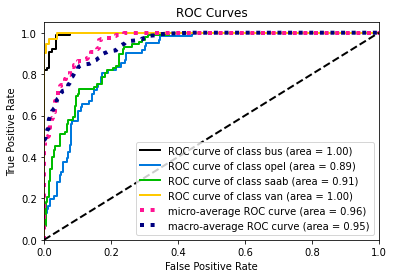

In [ ]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, logreg_pipe.predict_proba(X_test))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

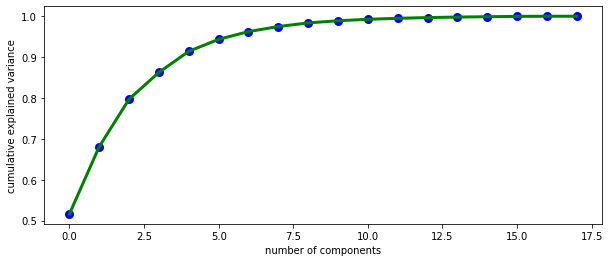

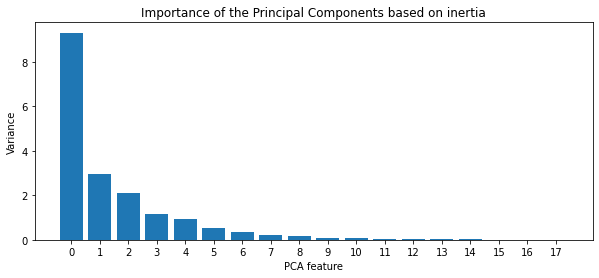

In [ ]:
from sklearn.decomposition import PCA
pca_pipe = make_pipeline(StandardScaler(),
                            PCA())
pca = pca_pipe.fit(X_train)['pca']
plt.figure(figsize = (10, 4))

plt.plot(np.cumsum(pca.explained_variance_ratio_), c = "g", linewidth = 3)
plt.scatter(np.arange(0, 18), np.cumsum(pca.explained_variance_ratio_), c = "b", linewidth = 3)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

features = range(pca.n_components_)
plt.figure(figsize=(10, 4))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Вообще, да, данные надо нормировать. Потому что PCA максимизирует дисперсию каждой фичи. Если данные не отнормированы, соответственно, дисперсия у всех разная, то это исходное значение будет сильно влиять на итоговую проекцию. То есть, если взять фичи с разной дисперсией (то есть разброс по осям разный), то при проецировании, конечно, ось у которой будет дисперсия больше, будет иметь большой вклад.

Давайте посмотрим, как будет выглядеть PCA на неотнормированных данных и сравним.

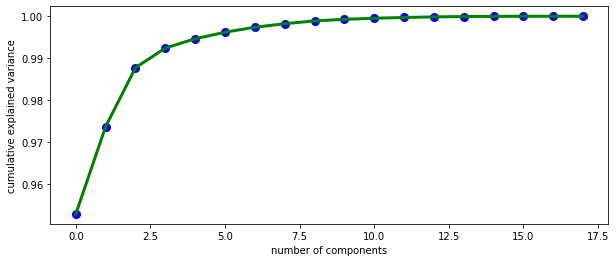

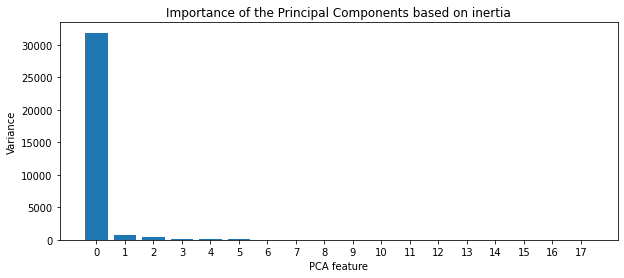

In [ ]:
pca_nn = PCA().fit(X_train) #no normalization
plt.figure(figsize = (10, 4))
plt.plot(np.cumsum(pca_nn.explained_variance_ratio_), c = "g", linewidth = 3)
plt.scatter(np.arange(0, 18), np.cumsum(pca_nn.explained_variance_ratio_), c = "b", linewidth = 3)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

features = range(pca_nn.n_components_)
plt.figure(figsize=(10, 4))
plt.bar(features, pca_nn.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

Мы как раз получили, что у нас две компоненты с огромной дисперсией, а остальные не важны.

Вернемся в нормированным данным.


In [ ]:
list(zip(np.around(np.cumsum(pca.explained_variance_ratio_)*100, decimals = 1), np.linspace(1, len(pca.explained_variance_ratio_)+1, len(pca.explained_variance_ratio_)+1, dtype = int)))

[(51.6, 1),
 (68.1, 2),
 (79.7, 3),
 (86.3, 4),
 (91.4, 5),
 (94.3, 6),
 (96.2, 7),
 (97.5, 8),
 (98.4, 9),
 (98.9, 10),
 (99.3, 11),
 (99.5, 12),
 (99.7, 13),
 (99.8, 14),
 (99.9, 15),
 (100.0, 16),
 (100.0, 17),
 (100.0, 18)]

Соответственно, более 11 компонент нет смысла брать, поскольку их вклад оставшихся компонент в исходные данные менее 1%

In [ ]:
pca_pipe_log = make_pipeline(StandardScaler(),
                            PCA(n_components=11))
X_train_pca = pd.DataFrame(data = pca_pipe_log.fit_transform(X_train))

X_test_pca = pd.DataFrame(data = pca_pipe_log.transform(X_test))

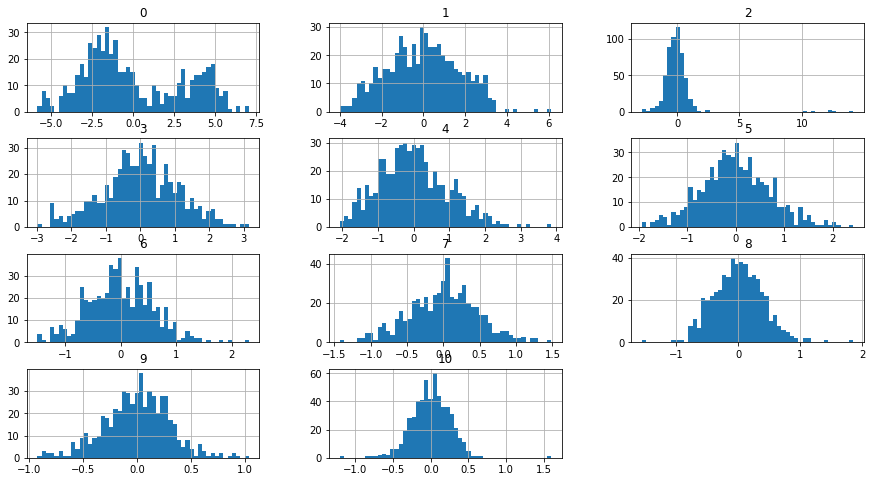

In [ ]:
X_train_pca.hist(bins=50, figsize=(15,8))
plt.show()

11 фичей с красивым распределением (почти), круто!

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
#Чтобы иметь перед глазами
print(parameters)

{'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
        46.42, 100.  ])}


In [ ]:
grid_logreg_pca, res_logreg_pca = grid_cv(make_pipeline(StandardScaler(), logreg), parameters, X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print("Best parameter (CV score=%0.3f):" % grid_logreg_pca.best_score_)
print(grid_logreg_pca.best_params_)

Best parameter (CV score=0.774):
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}


In [ ]:
print('mean_train_accuracy, mean_train_f1_macro, mean_test_accuracy, mean_test_f1_macro')
res_logreg_pca

mean_train_accuracy, mean_train_f1_macro, mean_test_accuracy, mean_test_f1_macro


[({'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'},
  0.745,
  0.739,
  0.736,
  0.727),
 ({'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'},
  0.787,
  0.783,
  0.774,
  0.77),
 ({'logisticregression__C': 0.22, 'logisticregression__penalty': 'l1'},
  0.774,
  0.77,
  0.749,
  0.743),
 ({'logisticregression__C': 0.22, 'logisticregression__penalty': 'l2'},
  0.791,
  0.788,
  0.772,
  0.768),
 ({'logisticregression__C': 0.46, 'logisticregression__penalty': 'l1'},
  0.789,
  0.786,
  0.763,
  0.759),
 ({'logisticregression__C': 0.46, 'logisticregression__penalty': 'l2'},
  0.789,
  0.786,
  0.77,
  0.767),
 ({'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1'},
  0.788,
  0.786,
  0.763,
  0.761),
 ({'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'},
  0.788,
  0.786,
  0.767,
  0.764),
 ({'logisticregression__C': 2.15, 'logisticregression__penalty': 'l1'},
  0.788,
  0.787,
  0.765,
  0.764),
 ({'logisticregression__C'

In [ ]:
logreg_pipe_pca = make_pipeline(StandardScaler(),
                            LogisticRegression(multi_class='multinomial', 
                                               solver='saga', tol=1e-3, 
                                               max_iter=500, random_state=0, 
                                               C = grid_logreg_pca.best_params_['logisticregression__C'], 
                                               penalty = grid_logreg_pca.best_params_['logisticregression__penalty']))
logreg_pipe_pca.fit(X_train_pca, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=500,
                                    multi_class='multinomial', random_state=0,
                                    solver='saga', tol=0.001))])

In [ ]:
print_scores(logreg_pipe_pca.predict(X_train_pca), logreg_pipe_pca.predict(X_test_pca), y_train, y_test)

accuracy score
train: 0.790528
test:  0.696970

f1 score
train: 0.787010
test:  0.693572


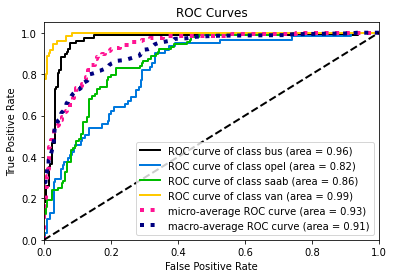

In [ ]:
plot_roc(y_test, logreg_pipe_pca.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 0)
tree_parameters = {
    'max_depth': np.linspace(1,10,10, dtype = int)
    }

In [ ]:
grid_dtree, res_dtree = grid_cv(decision_tree, tree_parameters, X_train, y_train)

In [ ]:
print("Best parameter (CV score=%0.3f):" % grid_dtree.best_score_)
print(grid_dtree.best_params_)
print('mean_train_accuracy, mean_train_f1_macro, mean_test_accuracy, mean_test_f1_macro')
res_dtree

Best parameter (CV score=0.709):
{'max_depth': 9}
mean_train_accuracy, mean_train_f1_macro, mean_test_accuracy, mean_test_f1_macro


[({'max_depth': 1}, 0.422, 0.279, 0.413, 0.274),
 ({'max_depth': 2}, 0.554, 0.476, 0.545, 0.467),
 ({'max_depth': 3}, 0.695, 0.653, 0.658, 0.612),
 ({'max_depth': 4}, 0.749, 0.723, 0.67, 0.642),
 ({'max_depth': 5}, 0.801, 0.799, 0.665, 0.662),
 ({'max_depth': 6}, 0.85, 0.849, 0.681, 0.678),
 ({'max_depth': 7}, 0.9, 0.901, 0.687, 0.684),
 ({'max_depth': 8}, 0.933, 0.933, 0.678, 0.678),
 ({'max_depth': 9}, 0.956, 0.956, 0.709, 0.711),
 ({'max_depth': 10}, 0.975, 0.975, 0.688, 0.688)]

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 0, **grid_dtree.best_params_)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [ ]:
print_scores(decision_tree.predict(X_train), decision_tree.predict(X_test), y_train, y_test)

accuracy score
train: 0.945355
test:  0.686869

f1 score
train: 0.945892
test:  0.692741


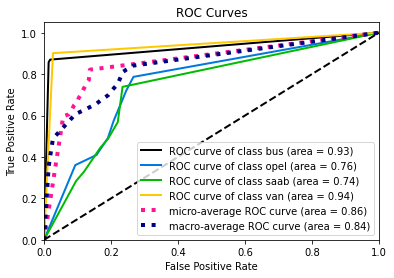

In [ ]:
plot_roc(y_test, decision_tree.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier

def fit_score(model, X_train, y_train, X_test): 
  model.fit(X_train, y_train)

  predict_test = model.predict(X_test)
  predict_train = model.predict(X_train)

  return accuracy_score(y_train, predict_train), accuracy_score(y_test, predict_test), f1_score(y_train, predict_train, average='macro'),  f1_score(y_test, predict_test, average='macro')


In [ ]:
result_trees = []
for i in range(2,100,5):
  clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state = 0, **grid_dtree.best_params_), 
                          n_estimators = i, bootstrap = True, random_state=0)
  res = fit_score(clf, X_train, y_train, X_test)
  result_trees.append(res)
  print(i, res)
result_trees=np.array(result_trees)

2 (0.8834244080145719, 0.632996632996633, 0.8834184907038249, 0.639727843796158)
7 (0.970856102003643, 0.7104377104377104, 0.9708329207581893, 0.7126113416248255)
12 (0.9890710382513661, 0.7272727272727273, 0.9891925274046627, 0.7281782354436817)
17 (0.9927140255009107, 0.7373737373737373, 0.9928042763157895, 0.7373792856525551)
22 (0.9963570127504554, 0.7373737373737373, 0.9964021381578947, 0.7373015265376548)
27 (0.9963570127504554, 0.7205387205387206, 0.9964063863648032, 0.7206524082916302)
32 (0.9963570127504554, 0.7239057239057239, 0.9964063863648032, 0.724719082670404)
37 (0.9981785063752276, 0.7373737373737373, 0.9982021548458349, 0.7375159096801566)
42 (0.9981785063752276, 0.7441077441077442, 0.9982021548458349, 0.7430102429673812)
47 (0.9981785063752276, 0.7407407407407407, 0.9982021548458349, 0.739467017296937)
52 (0.9963570127504554, 0.7272727272727273, 0.9964021381578947, 0.725265772975857)
57 (0.9981785063752276, 0.7306397306397306, 0.9982021548458349, 0.7300051867700316)


In [ ]:
result_logreg = []
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)
for i in range(2,100,5):
  clf = BaggingClassifier(base_estimator = LogisticRegression(multi_class='multinomial', 
                            solver='saga', tol=1e-3, max_iter=500, random_state=0, 
                            C = grid_logreg.best_params_['logisticregression__C'], 
                            penalty = grid_logreg.best_params_['logisticregression__penalty']), 
                          n_estimators = i, bootstrap = True, random_state=0)
  res = fit_score(clf, X_train_ss, y_train, X_test_ss)
  result_logreg.append(res)
  print(i, res)
result_logreg = np.array(result_logreg)

2 (0.8360655737704918, 0.7575757575757576, 0.8332324807973612, 0.7568249546418561)
7 (0.8214936247723132, 0.7845117845117845, 0.821739570652614, 0.7832954028265453)
12 (0.8306010928961749, 0.7912457912457912, 0.8311173121186295, 0.7899864998289786)
17 (0.8324225865209471, 0.7845117845117845, 0.8330595654448567, 0.7833878100729005)
22 (0.825136612021858, 0.7744107744107744, 0.825784934159152, 0.7737769232054402)
27 (0.825136612021858, 0.7744107744107744, 0.8257782771850521, 0.7742187504956262)
32 (0.8214936247723132, 0.7710437710437711, 0.8216811728651124, 0.7709487899661375)
37 (0.8233151183970856, 0.7744107744107744, 0.8233743920365323, 0.7737648201554114)
42 (0.8233151183970856, 0.7710437710437711, 0.8231931623402402, 0.7704695288995638)
47 (0.825136612021858, 0.7744107744107744, 0.8248666507024127, 0.7732622082822667)
52 (0.8287795992714025, 0.7777777777777778, 0.8285196066955024, 0.776571900845619)
57 (0.8287795992714025, 0.7777777777777778, 0.828351888235101, 0.776571900845619)
62

In [ ]:
#ac_train ac_test f1_train f1_test

def plot_graphs(X_result, y_result=None, plot_train=True, plot_title = None):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

  if plot_title is not None: 
    f.suptitle(plot_title)

  if y_result is None: 
    y_result = np.arange(0,len(X_result))
  
  if plot_train is True:
    ax1.plot(y_result, X_result[:,0], linestyle='dashed', label = 'train')
    ax2.plot(y_result, X_result[:,2], linestyle='dashed', label = 'train')

  ax1.plot(y_result, X_result[:,1], label = 'test')
  ax1.set_title('Accuracy')

  ax2.plot(y_result, X_result[:,3], label = 'test')
  ax2.set_title('F1 score')
  ax1.legend()
  ax2.legend()


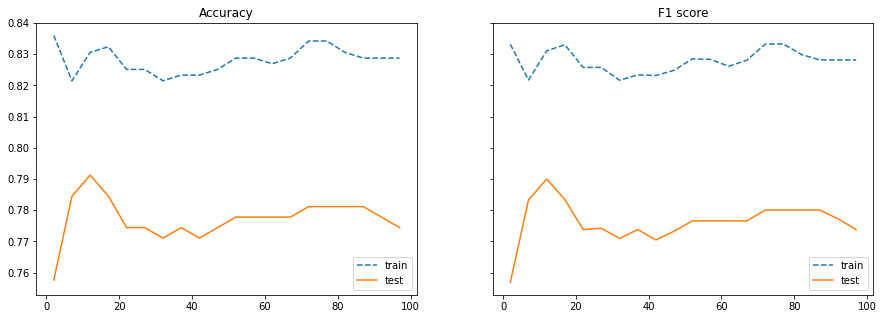

In [ ]:
plot_graphs(result_logreg, np.arange(2,100,5))

Можно видеть, что линейная комбинация линейных алгоритмов не сильно помогает.

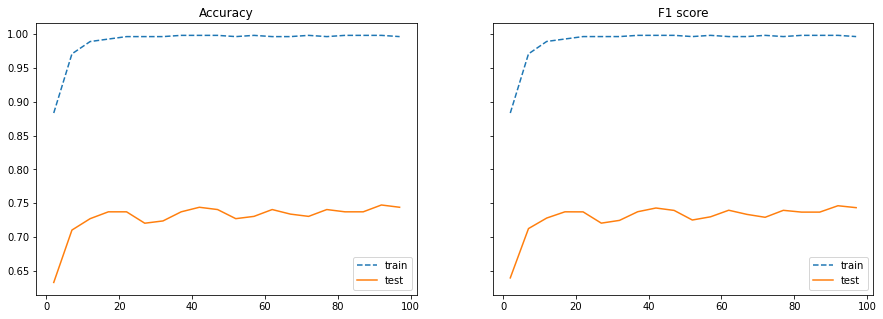

In [ ]:
plot_graphs(result_trees,np.arange(2,100,5))

Тут уже можно видеть некоторую тенденцию к улучшению результата с увеличением количества алгоритмов. 

При обучении деревьев мы используем достаточно большие деревья, которые сами могут вполне неплохо описывать наш датасет и похожи. Поэтому, увеличение числа не дает сильного прироста качества после 12 деревьев. Чтобы от этого избавиться, надо брать деревья попроще (сделать прунинг), чтобы они больше отличались друг от друга.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

result_forest = []

for i in range(2,100,5):
  forest = RandomForestClassifier(n_estimators=i, random_state=0)
  res = fit_score(forest, X_train, y_train, X_test)
  result_forest.append(res)
  print(i, res)

result_forest = np.array(result_forest)

2 (0.8542805100182149, 0.6026936026936027, 0.849680931458425, 0.6015465096112336)
7 (0.9799635701275046, 0.7205387205387206, 0.9800788068240156, 0.7238041951023686)
12 (0.9963570127504554, 0.7104377104377104, 0.9964021381578947, 0.7151760271149425)
17 (1.0, 0.7138047138047138, 1.0, 0.7154051514354197)
22 (1.0, 0.7575757575757576, 1.0, 0.7572446510364582)
27 (1.0, 0.7542087542087542, 1.0, 0.7544936113113834)
32 (1.0, 0.7542087542087542, 1.0, 0.753958233020976)
37 (1.0, 0.7542087542087542, 1.0, 0.7533016471252238)
42 (1.0, 0.7643097643097643, 1.0, 0.763474986142329)
47 (1.0, 0.7609427609427609, 1.0, 0.7600945051329252)
52 (1.0, 0.7575757575757576, 1.0, 0.7561407364814745)
57 (1.0, 0.7575757575757576, 1.0, 0.7574649859943976)
62 (1.0, 0.7609427609427609, 1.0, 0.760148440418523)
67 (1.0, 0.7676767676767676, 1.0, 0.7668357744254739)
72 (1.0, 0.7643097643097643, 1.0, 0.7635245161473283)
77 (1.0, 0.7609427609427609, 1.0, 0.7607304900181489)
82 (1.0, 0.7542087542087542, 1.0, 0.753184277140976)

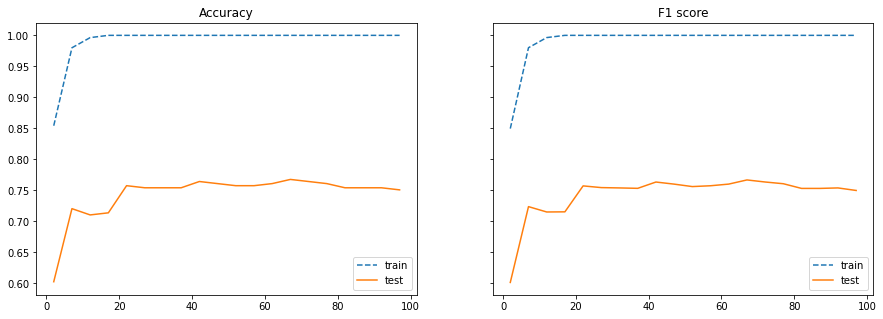

In [ ]:
plot_graphs(result_forest, np.arange(2,100,5))

Давайте посмотрим на графики всех классификаторов вместе


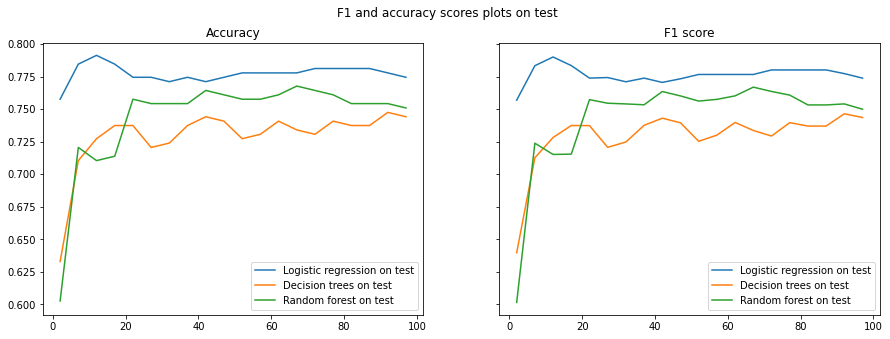

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

f.suptitle('F1 and accuracy scores plots on test')

ax1.plot(np.arange(2,100,5), result_logreg[:,1], label = 'Logistic regression on test')
ax1.plot(np.arange(2,100,5), result_trees[:,1], label = 'Decision trees on test')
ax1.plot(np.arange(2,100,5), result_forest[:,1], label = 'Random forest on test')
ax1.set_title('Accuracy')

ax2.plot(np.arange(2,100,5), result_logreg[:,3], label = 'Logistic regression on test')
ax2.plot(np.arange(2,100,5), result_trees[:,3], label = 'Decision trees on test')
ax2.plot(np.arange(2,100,5), result_forest[:,3], label = 'Random forest on test')

ax2.set_title('F1 score')
ax1.legend()
ax2.legend()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split_data = StratifiedShuffleSplit(n_splits=10, test_size = None, random_state=0)


In [ ]:
parts = []
for i, (train_index, _) in enumerate(split_data.split(X_train, y_train)):
  if i>0:
    parts.append(((np.concatenate((parts[i-1][0], X_train[train_index]))),
                  (np.concatenate((parts[i-1][1], y_train[train_index])))))
  else: 
    parts.append((X_train[train_index], y_train[train_index]))


In [ ]:
logreg_pipe = make_pipeline(StandardScaler(),
                            LogisticRegression(multi_class='multinomial', 
                                               solver='saga', tol=1e-3, 
                                               max_iter=500, random_state=0, 
                                               C = grid_logreg.best_params_['logisticregression__C'], 
                                               penalty = grid_logreg.best_params_['logisticregression__penalty']))

decision_tree = DecisionTreeClassifier(random_state = 0, **grid_dtree.best_params_)

forest = RandomForestClassifier(n_estimators=32, random_state = 0)

In [ ]:
logreg_result = []
trees_result = []
forest_result = [] 

for x, y in parts:
  print(x.shape, y.shape)
  logreg_result.append(fit_score(logreg_pipe, x, y, X_test))
  trees_result.append(fit_score(decision_tree, x, y, X_test))
  forest_result.append(fit_score(forest, x, y, X_test))


(494, 18) (494,)
(988, 18) (988,)
(1482, 18) (1482,)
(1976, 18) (1976,)
(2470, 18) (2470,)
(2964, 18) (2964,)
(3458, 18) (3458,)
(3952, 18) (3952,)
(4446, 18) (4446,)
(4940, 18) (4940,)


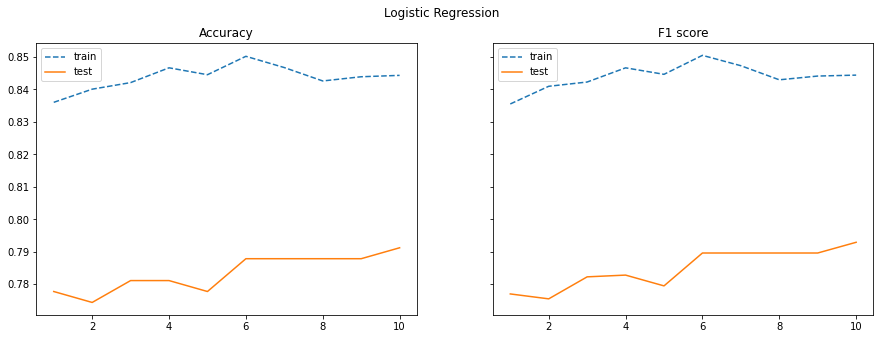

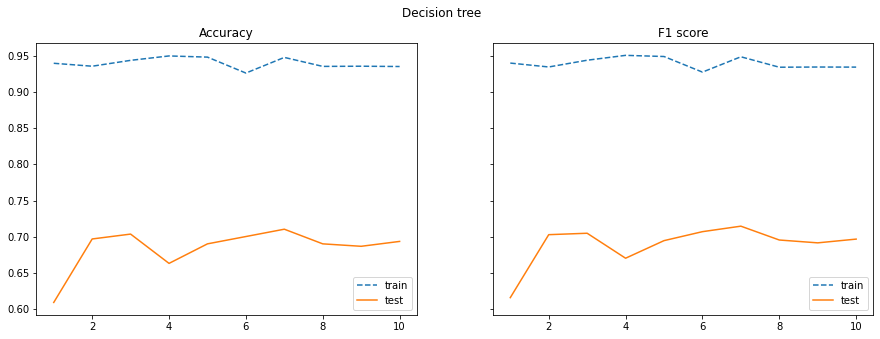

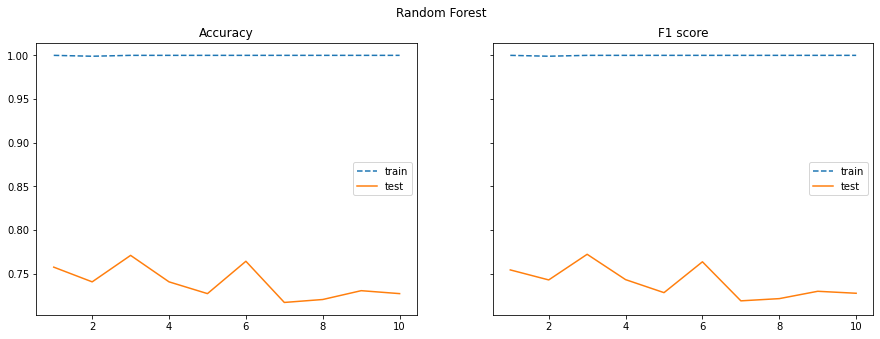

In [ ]:
plot_graphs(np.array(logreg_result), np.arange(1,11), plot_title = 'Logistic Regression')
plot_graphs(np.array(trees_result), np.arange(1,11), plot_title = 'Decision tree')
plot_graphs(np.array(forest_result), np.arange(1,11), plot_title = 'Random Forest')

Ну, что меняется при увеличении выборки. Увеличивается количество представителей каждого класса, а также количество выбросов. Т.к. я использовала StratifiedShuffleSplit, то соотношение классов аналогично исходному датасету. Поэтому, в целом, сложно что-то сказать, но увеличение датасета очень понравилось логистической регрессии. 